In [4]:
import pandas as pd

file_path = r'C:\Users\pesha\Downloads\archive (3)\flights_sample_3m.csv'

df = pd.read_csv(file_path, nrows=100000)  # Load only the first 100,000 rows
print(df.head())


      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0   
1            S

In [38]:
!pip install --upgrade numpy pandas scikit-learn



In [5]:
df.shape
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1]) +" columns from the flight dataset.")

There are 100000 rows and 32 columns from the flight dataset.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  100000 non-null  object 
 1   AIRLINE                  100000 non-null  object 
 2   AIRLINE_DOT              100000 non-null  object 
 3   AIRLINE_CODE             100000 non-null  object 
 4   DOT_CODE                 100000 non-null  int64  
 5   FL_NUMBER                100000 non-null  int64  
 6   ORIGIN                   100000 non-null  object 
 7   ORIGIN_CITY              100000 non-null  object 
 8   DEST                     100000 non-null  object 
 9   DEST_CITY                100000 non-null  object 
 10  CRS_DEP_TIME             100000 non-null  int64  
 11  DEP_TIME                 97443 non-null   float64
 12  DEP_DELAY                97442 non-null   float64
 13  TAXI_OUT                 97414 non-null   float64
 14  WHEEL

In [6]:
df['FL_DATE'] =  pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [7]:
df = df.drop(df[df.CANCELLED == True].index)

In [8]:
df = df.drop(df[df.DIVERTED == True].index)

In [9]:
def checkMissing(data,perc=0):
    """
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
               column_name  percentage
0        CANCELLATION_CODE  100.000000
1        DELAY_DUE_CARRIER   81.728306
2        DELAY_DUE_WEATHER   81.728306
3            DELAY_DUE_NAS   81.728306
4       DELAY_DUE_SECURITY   81.728306
5  DELAY_DUE_LATE_AIRCRAFT   81.728306


In [10]:
columns_to_drop = ['CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
                   'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df = df.drop(columns=columns_to_drop)

df = df.dropna(subset=['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME'])

In [11]:
import datetime
import numpy as np

# Function that converts the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == '2400':
            chaine = '0000'
        chaine = "{0:04d}".format(int(chaine))
        # Extract hour and minute parts
        hour = int(chaine[0:2])
        minute = int(chaine[2:4])
        # Handle the special case where hour is 24
        if hour == 24:
            hour = 0
        # Return datetime.time object
        heure = datetime.time(hour, minute)
        return heure
df['DEP_TIME'] = df['DEP_TIME'].apply(format_heure)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(format_heure)
df['ARR_TIME'] = df['ARR_TIME'].apply(format_heure)

# Apply the function to 'WheelsOff' and 'WheelsOn' columns as well
df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(format_heure)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(format_heure)

In [12]:
df[['DEP_TIME','CRS_DEP_TIME','ARR_TIME','WHEELS_OFF','WHEELS_ON']].head(5)

,DEP_TIME,CRS_DEP_TIME,ARR_TIME,WHEELS_OFF,WHEELS_ON
0,11:51:00,11:55:00,14:47:00,12:10:00,14:43:00
1,21:14:00,21:20:00,23:10:00,21:23:00,22:32:00
2,10:00:00,09:54:00,12:52:00,10:20:00,12:47:00
3,16:08:00,16:09:00,18:53:00,16:35:00,18:44:00
4,18:38:00,18:40:00,20:40:00,18:53:00,20:26:00


In [13]:
df[['DEP_TIME','CRS_DEP_TIME','ARR_TIME','WHEELS_OFF','WHEELS_ON']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 97205 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DEP_TIME      97205 non-null  object
 1   CRS_DEP_TIME  97205 non-null  object
 2   ARR_TIME      97205 non-null  object
 3   WHEELS_OFF    97205 non-null  object
 4   WHEELS_ON     97205 non-null  object
dtypes: object(5)
memory usage: 4.4+ MB


In [14]:
import pandas as pd

# Function to calculate time difference in minutes
def time_difference(actual, plan):
    try:
        actual_time = pd.to_datetime(actual, format='%H:%M:%S')
        plan_time = pd.to_datetime(plan, format='%H:%M:%S')
        time_diff = (actual_time - plan_time).dt.total_seconds() / 60
        return time_diff
    except ValueError:
        return None  # Handle NaN values or invalid time formats gracefully

# Apply the function and filter out incorrect records
df['WHEELS_OFF_elapse'] = time_difference(df['WHEELS_OFF'], df['DEP_TIME'])
df['WHEELS_ON_elapse'] = time_difference(df['ARR_TIME'], df['WHEELS_ON'])

# Remove records where time difference is negative or NaN
df = df.dropna(subset=['WHEELS_OFF_elapse', 'WHEELS_ON_elapse'])
df = df[(df['WHEELS_OFF_elapse'] > 0) & (df['WHEELS_ON_elapse'] > 0)]

In [54]:
df.head(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,14:47:00,-14.0,0.0,0.0,186.0,176.0,153.0,1065.0,19.0,4.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,23:10:00,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,9.0,38.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,12:52:00,0.0,0.0,0.0,118.0,112.0,87.0,680.0,20.0,5.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,18:53:00,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,27.0,9.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,20:40:00,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,15.0,14.0


In [53]:
df.AIRLINE.value_counts()

AIRLINE
Southwest Airlines Co.                18202
Delta Air Lines Inc.                  13144
American Airlines Inc.                12156
SkyWest Airlines Inc.                 11255
United Air Lines Inc.                  8134
Republic Airline                       4689
Envoy Air                              3965
Endeavor Air Inc.                      3731
JetBlue Airways                        3545
PSA Airlines Inc.                      3449
Alaska Airlines Inc.                   3140
Spirit Air Lines                       3078
Frontier Airlines Inc.                 2098
Mesa Airlines Inc.                     2028
Allegiant Air                          1645
Hawaiian Airlines Inc.                 1052
Horizon Air                             625
ExpressJet Airlines LLC d/b/a aha!      599
Name: count, dtype: int64

In [52]:
df.DEST.value_counts().iloc[:6]

DEST
ATL    5104
DFW    4217
ORD    3942
DEN    3816
CLT    3073
LAX    2786
Name: count, dtype: int64

In [15]:
top_cities = df.DEST.value_counts().iloc[0:6].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,5104
1,DFW,4217
2,ORD,3942
3,DEN,3816
4,CLT,3073


In [16]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [17]:
boolean_series =  df.DEST.isin(city_list)
df =  df[boolean_series]
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,20:40:00,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,15.0,14.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,07:06:00,-11.0,0.0,0.0,227.0,219.0,200.0,1379.0,11.0,8.0
11,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",...,13:57:00,-1.0,0.0,0.0,171.0,176.0,151.0,1061.0,14.0,11.0
13,2019-11-20,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1065,BDL,"Hartford, CT",ATL,"Atlanta, GA",...,08:08:00,-32.0,0.0,0.0,160.0,133.0,112.0,859.0,15.0,6.0
16,2020-07-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1225,STT,"Charlotte Amalie, VI",ATL,"Atlanta, GA",...,19:48:00,-9.0,0.0,0.0,222.0,215.0,197.0,1599.0,15.0,3.0


In [18]:
status = []

for value in df['ARR_DELAY']:
    if value <= 10:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status

In [19]:
df_category = df.select_dtypes(include=['object','category'])
df_numerical = df.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

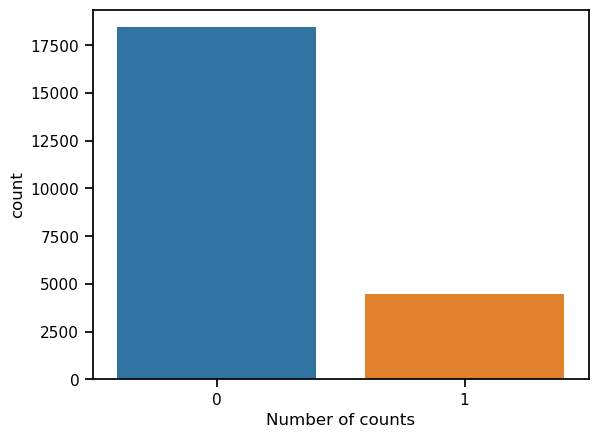

In [66]:
# Output Barplot showing the occurence of flight outcome
import seaborn as sb
sb.set_context("notebook")
g=sb.countplot(x="FLIGHT_STATUS",data=df)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

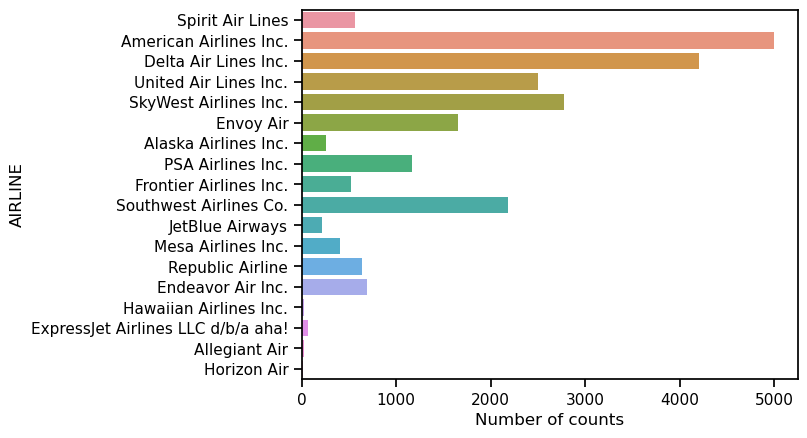

In [67]:
# Output Barplot showing the occurence of each categorical features
sb.set_context("notebook")
g=sb.countplot(y="AIRLINE",data=df_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

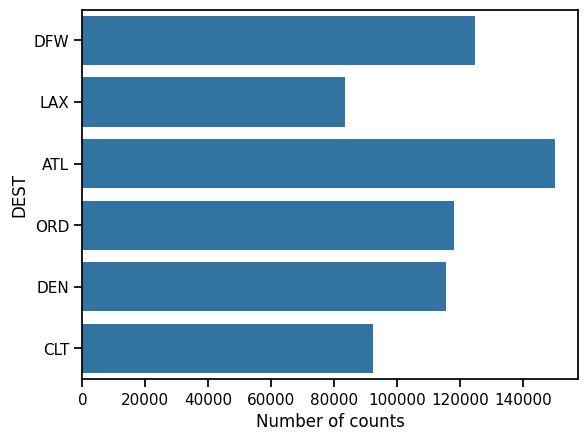

In [ ]:
# Output Barplot showing the occurence of each categorical features

sb.set_context("notebook")
g=sb.countplot(y="DEST",data=df_category)
g.set(xlabel="Number of counts")

In [20]:
# Assuming df is your DataFrame containing the FL_DATE column
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Extracting Year, Quarter, Month, and DayofMonth into separate columns
df['Year'] = df['FL_DATE'].dt.year
df['Quarter'] = df['FL_DATE'].dt.quarter
df['Month'] = df['FL_DATE'].dt.month
df['DayofMonth'] = df['FL_DATE'].dt.day

In [21]:
# Use pd.get_dummies() to convert the 'AIRLINE' column into dummy variables
Airline = pd.get_dummies(df['AIRLINE'], drop_first=True)
Airline.head()

,Allegiant Air,American Airlines Inc.,Delta Air Lines Inc.,Endeavor Air Inc.,Envoy Air,ExpressJet Airlines LLC d/b/a aha!,Frontier Airlines Inc.,Hawaiian Airlines Inc.,Horizon Air,JetBlue Airways,Mesa Airlines Inc.,PSA Airlines Inc.,Republic Airline,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
11,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
columns_to_drop = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'FL_NUMBER', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'Quarter']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

In [23]:
# Create dummy variables for 'ORIGIN' and 'DEST' columns
origin_dummies = pd.get_dummies(df['ORIGIN'], prefix='ORIGIN', drop_first=True)
dest_dummies = pd.get_dummies(df['DEST'], prefix='DEST', drop_first=True)

origin_dummies = origin_dummies.astype(int)
dest_dummies = dest_dummies.astype(int)


# Drop the original 'ORIGIN' and 'DEST' columns
df.drop(['ORIGIN', 'DEST'], axis=1, inplace=True)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


KeyboardInterrupt: 

In [69]:
# Filter correlation matrix for values greater than 0.9
high_corr = corr[(corr > 0.9) & (corr < 1.0)]

# Get the column pairs with high positive correlation
high_corr_pairs = [(column1, column2, corr.loc[column1, column2]) for column1 in high_corr.columns for column2 in high_corr.index if high_corr.loc[column2, column1] > 0]

# Create a DataFrame to display the column pairs and their correlation values
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
high_corr_df

NameError: name 'corr' is not defined

In [24]:
# Calculate the difference between CRS_ELAPSED_TIME and ELAPSED_TIME
df['ELAPSED_TIME_DIFF'] = df['ELAPSED_TIME'] - df['CRS_ELAPSED_TIME']

print(df[['CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'ELAPSED_TIME_DIFF']])

       CRS_ELAPSED_TIME  ELAPSED_TIME  ELAPSED_TIME_DIFF
4                 181.0         182.0                1.0
8                 227.0         219.0               -8.0
11                171.0         176.0                5.0
13                160.0         133.0              -27.0
16                222.0         215.0               -7.0
...                 ...           ...                ...
99971              92.0          82.0              -10.0
99972             131.0         130.0               -1.0
99986             148.0         127.0              -21.0
99987              96.0          86.0              -10.0
99999              82.0          67.0              -15.0

[22938 rows x 3 columns]


In [25]:
columns_to_drop = ['CRS_DEP_TIME','DEP_TIME','CRS_ARR_TIME','ARR_TIME','CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME','WHEELS_OFF','WHEELS_ON']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.head()

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse,FLIGHT_STATUS,Year,Month,DayofMonth,ELAPSED_TIME_DIFF
4,-2.0,15.0,14.0,-1.0,0.0,0.0,985.0,15.0,14.0,0,2020,2,23,1.0
8,-3.0,11.0,8.0,-11.0,0.0,0.0,1379.0,11.0,8.0,0,2023,2,12,-8.0
11,-6.0,14.0,11.0,-1.0,0.0,0.0,1061.0,14.0,11.0,0,2020,7,31,5.0
13,-5.0,15.0,6.0,-32.0,0.0,0.0,859.0,15.0,6.0,0,2019,11,20,-27.0
16,-2.0,15.0,3.0,-9.0,0.0,0.0,1599.0,15.0,3.0,0,2020,7,1,-7.0


In [26]:
df = pd.concat([df, origin_dummies, dest_dummies, Airline], axis=1)

In [27]:
df['FLIGHT_STATUS'].value_counts()

FLIGHT_STATUS
0    18450
1     4488
Name: count, dtype: int64

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.3 which is incompatible.


In [70]:
df.head(30)

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse,FLIGHT_STATUS,...,Hawaiian Airlines Inc.,Horizon Air,JetBlue Airways,Mesa Airlines Inc.,PSA Airlines Inc.,Republic Airline,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
4,-2.0,15.0,14.0,-1.0,0.0,0.0,985.0,15.0,14.0,0,...,False,False,False,False,False,False,False,False,True,False
8,-3.0,11.0,8.0,-11.0,0.0,0.0,1379.0,11.0,8.0,0,...,False,False,False,False,False,False,False,False,True,False
11,-6.0,14.0,11.0,-1.0,0.0,0.0,1061.0,14.0,11.0,0,...,False,False,False,False,False,False,False,False,False,False
13,-5.0,15.0,6.0,-32.0,0.0,0.0,859.0,15.0,6.0,0,...,False,False,False,False,False,False,False,False,False,False
16,-2.0,15.0,3.0,-9.0,0.0,0.0,1599.0,15.0,3.0,0,...,False,False,False,False,False,False,False,False,False,False
19,-4.0,31.0,12.0,35.0,0.0,0.0,1050.0,31.0,12.0,1,...,False,False,False,False,False,False,False,False,False,True
33,-2.0,10.0,14.0,-11.0,0.0,0.0,989.0,10.0,14.0,0,...,False,False,False,False,False,False,False,False,False,False
38,8.0,13.0,12.0,-9.0,0.0,0.0,801.0,13.0,12.0,0,...,False,False,False,False,False,False,False,False,False,False
47,-1.0,20.0,9.0,-8.0,0.0,0.0,967.0,20.0,9.0,0,...,False,False,False,False,False,False,False,False,False,True
48,8.0,11.0,10.0,-10.0,0.0,0.0,557.0,11.0,10.0,0,...,False,False,False,False,False,False,True,False,False,False


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

# Assuming df is your DataFrame containing the dataset

# Separate the features (X) and the target variable (y)
X = df.drop(labels=['FLIGHT_STATUS'], axis=1)
y = df['FLIGHT_STATUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

# Drop constant features
constant_features = DropConstantFeatures(tol=0.998)  # Adjust tolerance as needed
constant_features.fit(X_train)

# Transform the datasets
X_train = constant_features.transform(X_train)
X_test = constant_features.transform(X_test)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original class distribution in y_train:", y_train.value_counts())
print("Balanced class distribution in y_train_balanced:", y_train_balanced.value_counts())

Original class distribution in y_train: FLIGHT_STATUS
0    14751
1     3599
Name: count, dtype: int64
Balanced class distribution in y_train_balanced: FLIGHT_STATUS
0    14751
1    14751
Name: count, dtype: int64


In [80]:
print("Train data shape:", X_train_balanced.shape)
print("Test data shape:", X_test.shape)

Train data shape: (29502, 151)
Test data shape: (4588, 151)


In [33]:
!pip install xgboost --user

     -------------------------------------- 124.9/124.9 MB 7.1 MB/s eta 0:00:00


In [64]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.utils import to_categorical

# Ensure correct data types
X_train_balanced_reshaped = X_train_balanced_reshaped.astype(np.float32)
y_train_balanced = np.argmax(y_train_balanced, axis=1)

# One-hot encode the labels
num_classes = 2
y_train_balanced = to_categorical(y_train_balanced, num_classes)

# Split the data into train and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_train_balanced_reshaped, y_train_balanced, test_size=0.2, random_state=42
)

# Define activation functions to evaluate
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax']

for activation in activation_functions:
    # Define the LSTM model with regularization
    lstm_model = Sequential()
    lstm_model.add(Input(shape=(X_train_balanced_reshaped.shape[1], X_train_balanced_reshaped.shape[2])))
    lstm_model.add(LSTM(25, activation=activation, return_sequences=False))  # Reduced LSTM units with specified activation
    lstm_model.add(Dropout(0.5))  # Add dropout for regularization
    lstm_model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for classification

    # Compile the model
    lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the LSTM model
    lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, verbose=0)  # Verbose set to 0 for no output during training

    # Evaluate the LSTM Model
    lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)

    # Make predictions
    y_pred_prob = lstm_model.predict(X_test_lstm)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Convert y_test_lstm back to class labels
    y_test_class = np.argmax(y_test_lstm, axis=1)

    # Print accuracy and details
    print(f'\nLSTM Model Accuracy with {activation.upper()} activation: {lstm_accuracy:.2f}')
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test_class, y_pred))
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))


185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9924 - loss: 0.0185
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

LSTM Model Accuracy with RELU activation: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2950
           1       0.98      1.00      0.99      2951

    accuracy                           0.99      5901
   macro avg       0.99      0.99      0.99      5901
weighted avg       0.99      0.99      0.99      5901

Confusion Matrix:
[[2905   45]
 [   0 2951]]
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0398
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

LSTM Model Accuracy with SIGMOID activation: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2950
           1       0.99      1.00      0.99      2951

    accuracy                           0.99      5901
   macro avg       0.99      0.99